In [ ]:
# 머신 러닝
# input, label을 활용하여 규칙을 찾게 하는 과정
# 지도 학습 : label이 있다
# - K-NN, Decision Tree, Support Vector Machine
# 비지도 학습 : label이 없다
# 강화 학습 : 보상(reward)을 통해 학습

In [ ]:
# 비지도 학습 (Unsupervised Learning)
# - Label이 없다
# 군집, 차원 축소, 이상 탐지

In [ ]:
# 군집 알고리즘 (Clustering)
# - K-Means Clusering
# 핵심 개념 : 사용자가 지정한 K개의 군집을 설정하기 위해 
# 중심점을 설정하고, 각 데이터 포인터를 가장 가까운 중심점에 할당

# 순서
# 1) K개의 중심점을 설정
# 2) 할당 : 모든 데이터를 가장 가까운 중심점에 할당
# 3) 이동 : 각 군집의 중심점을 해당 군집에 속한 데이터들의 평균 위치로 이동

In [14]:
# 1) 임의의 데이터
from sklearn.datasets import make_blobs # 군집용 데이터 생성
from sklearn.cluster import KMeans      # 군집 알고리즘

# 속성 (200개 데이터, 2개의 특징, 최종 군집 개수 4개, 군집 표준 편차)
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.0, random_state=42)

# 엘보우 기법을 통해서 k를 찾아 나갈건데...지금은 일단 4로
k = 4
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
kmeans.fit(X)


KMeans(n_clusters=3, random_state=42)

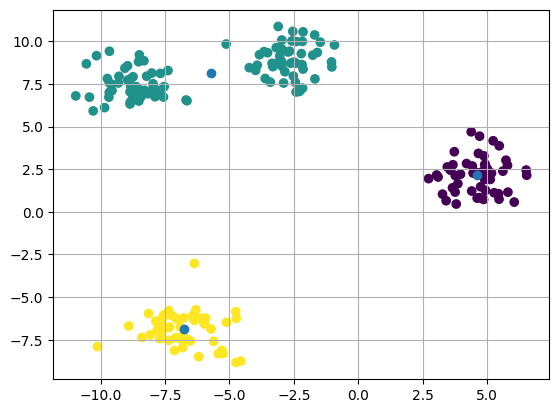

In [15]:
# 각 군집의 중심점 좌표, 군집 label
centors = kmeans.cluster_centers_ # 중심점 좌표
labels = kmeans.labels_           # X의 군집된 결과

# 이 결과를 토대로 시각화
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels) # 군집된 데이터 시각화
plt.scatter(centors[:, 0], centors[:, 1])
plt.grid(True)
plt.show()

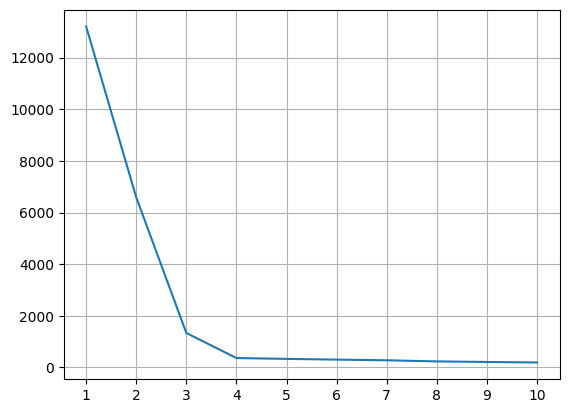

In [18]:
# 엘보우 방법을 이용한 최적의 k 찾기
k_range = range(1, 11)

inertia_list = []

for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans_test.fit(X)
    inertia_list.append(kmeans_test.inertia_) # 군집 내 데이터들과 중심점 사이의 거리

plt.plot(k_range, inertia_list)
plt.grid(True)
plt.xticks(k_range)
plt.show()

In [21]:
# 실제 data 가지고 군집
# 쇼핑몰 고객 데이터
import pandas as pd
df = pd.read_csv("https://github.com/nayeho/robot/raw/refs/heads/main/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


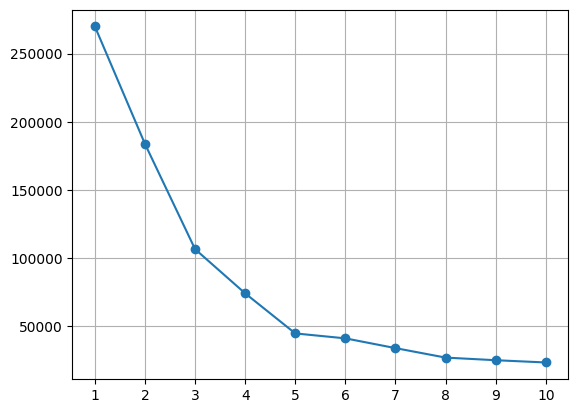

In [30]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
# 우리가 사용할 머신 러닝 input은 대개 ndarray
X = X.values

# 우리의 목표 
# X를 k개로 군집화 시키고 싶다!!

# 엘보우 방법을 사용해보자 : 그래프 확인 결과 k는 5가 적당!!
k_range = range(1, 11)
inertia_list = []
for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans_test.fit(X)
    inertia_list.append(kmeans_test.inertia_)

plt.plot(k_range, inertia_list, marker="o")
plt.grid(True)
plt.xticks(k_range)
plt.show()


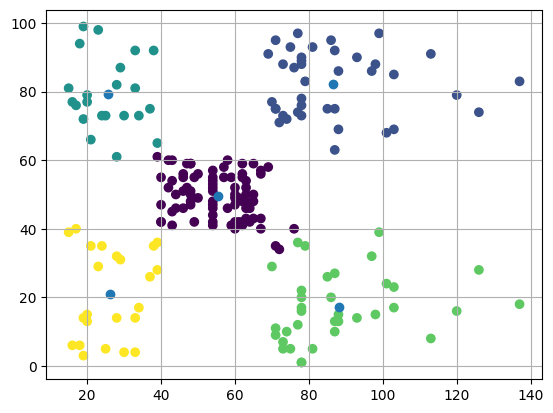

In [31]:
# 우리는 엘보우 방법으로 군집 k 5 확인!!
kmeans = KMeans(n_clusters=5, random_state=42, n_init="auto")
kmeans.fit(X)
centors = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centors[:, 0], centors[:, 1])
plt.grid(True)
plt.show()

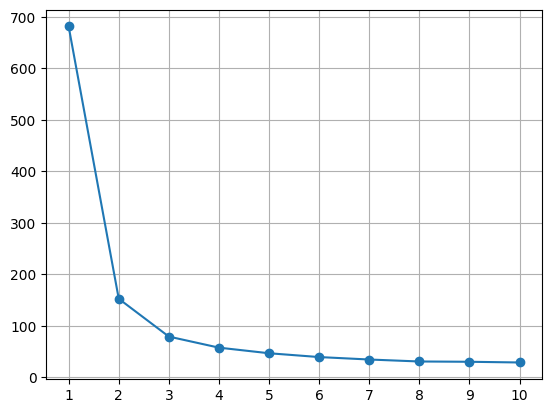

In [34]:
# 지도학습-분류
from sklearn.datasets import load_iris

iris_dataset = load_iris()
iris_dataset

# 비지도학습-군집
X = iris_dataset.data

k_range = range(1, 11)
inertia_list = []
for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans_test.fit(X)
    inertia_list.append(kmeans_test.inertia_)

plt.plot(k_range, inertia_list, marker="o")
plt.grid(True)
plt.xticks(k_range)
plt.show()

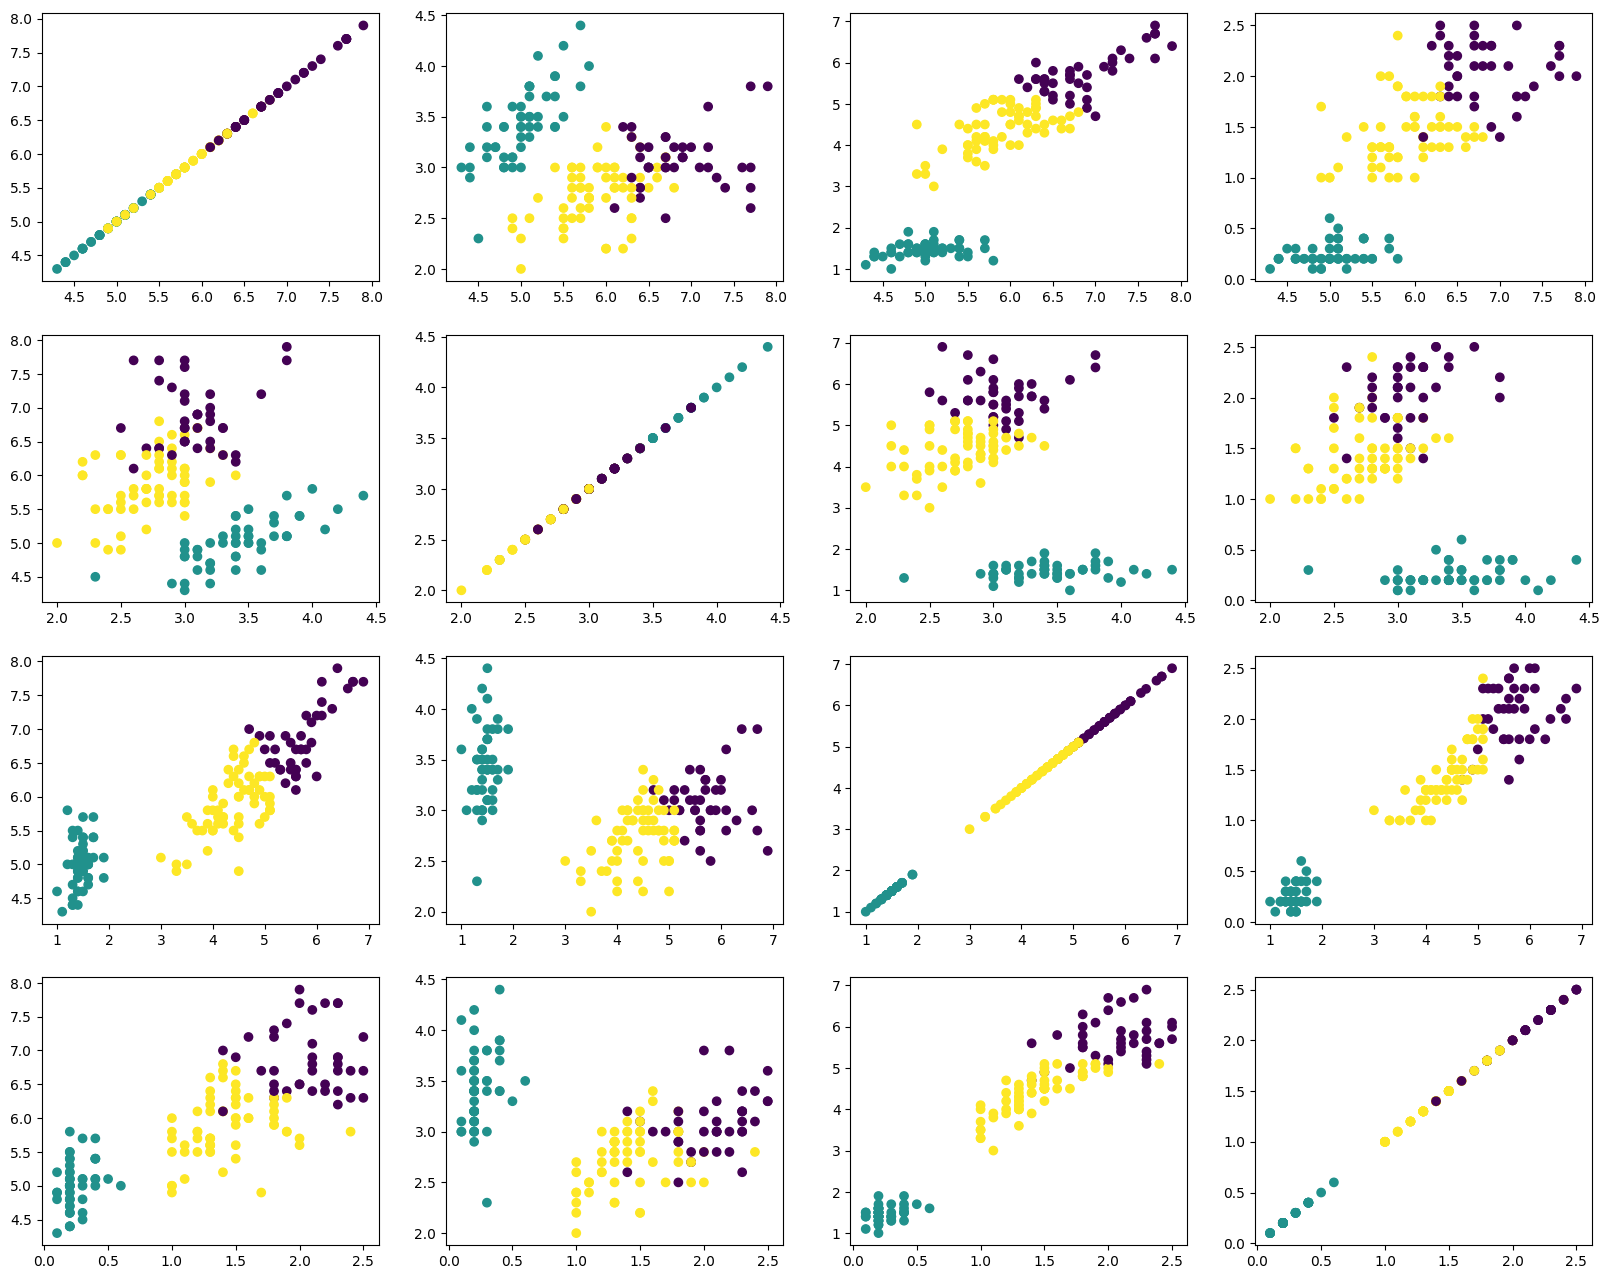

In [40]:
# 엘보우 방법을 통해 k가 3을 확인하였다
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans.fit(X)

centors = kmeans.cluster_centers_
labels = kmeans.labels_

fig, axis = plt.subplots(4, 4, figsize=(20, 16))

for i in range(4):
    for j in range(4):
        axis[i, j].scatter(X[:, i], X[:, j], c=labels)
        
plt.show()

In [ ]:
# 다른 형태의 군집되어 있는 데이터를 학습
# 밀도 기반 알고리즘
# DBSCAN(Desity-Based Spatial Clustering of Applications with Noise)
# 밀집되어 있는 영역 기반 군집 알고리즘
# 핵심 개념
# eps(epsilon) : 개별 데이터를 중심으로 하는 원의 반경
# min_samples : 하나의 군집으로 인정받기 위한 최소 샘플 수

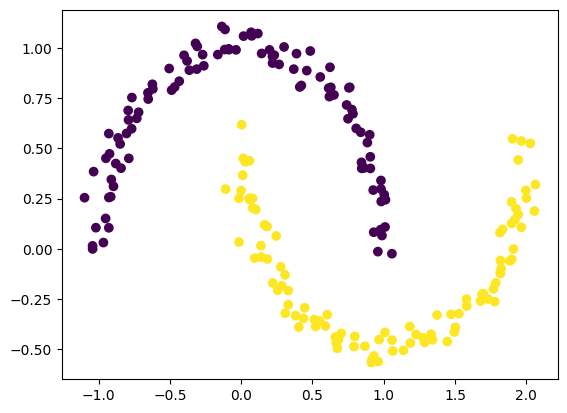

In [46]:
from sklearn.datasets import make_moons # 초승달 모양 데이터 생성
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.show()

In [47]:
# 실제 피지 지진 데이터를 DBSCAN 활용해서 군집
df = pd.read_csv("https://github.com/nayeho/robot/raw/refs/heads/main/quakes.csv")
df

,rownames,lat,long,depth,mag,stations
0,1,-20.42,181.62,562,4.8,41
1,2,-20.62,181.03,650,4.2,15
2,3,-26.00,184.10,42,5.4,43
3,4,-17.97,181.66,626,4.1,19
4,5,-20.42,181.96,649,4.0,11
...,...,...,...,...,...,...
995,996,-25.93,179.54,470,4.4,22
996,997,-12.28,167.06,248,4.7,35
997,998,-20.13,184.20,244,4.5,34
998,999,-17.40,187.80,40,4.5,14


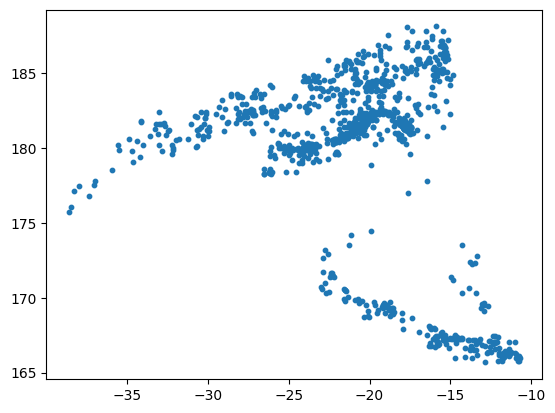

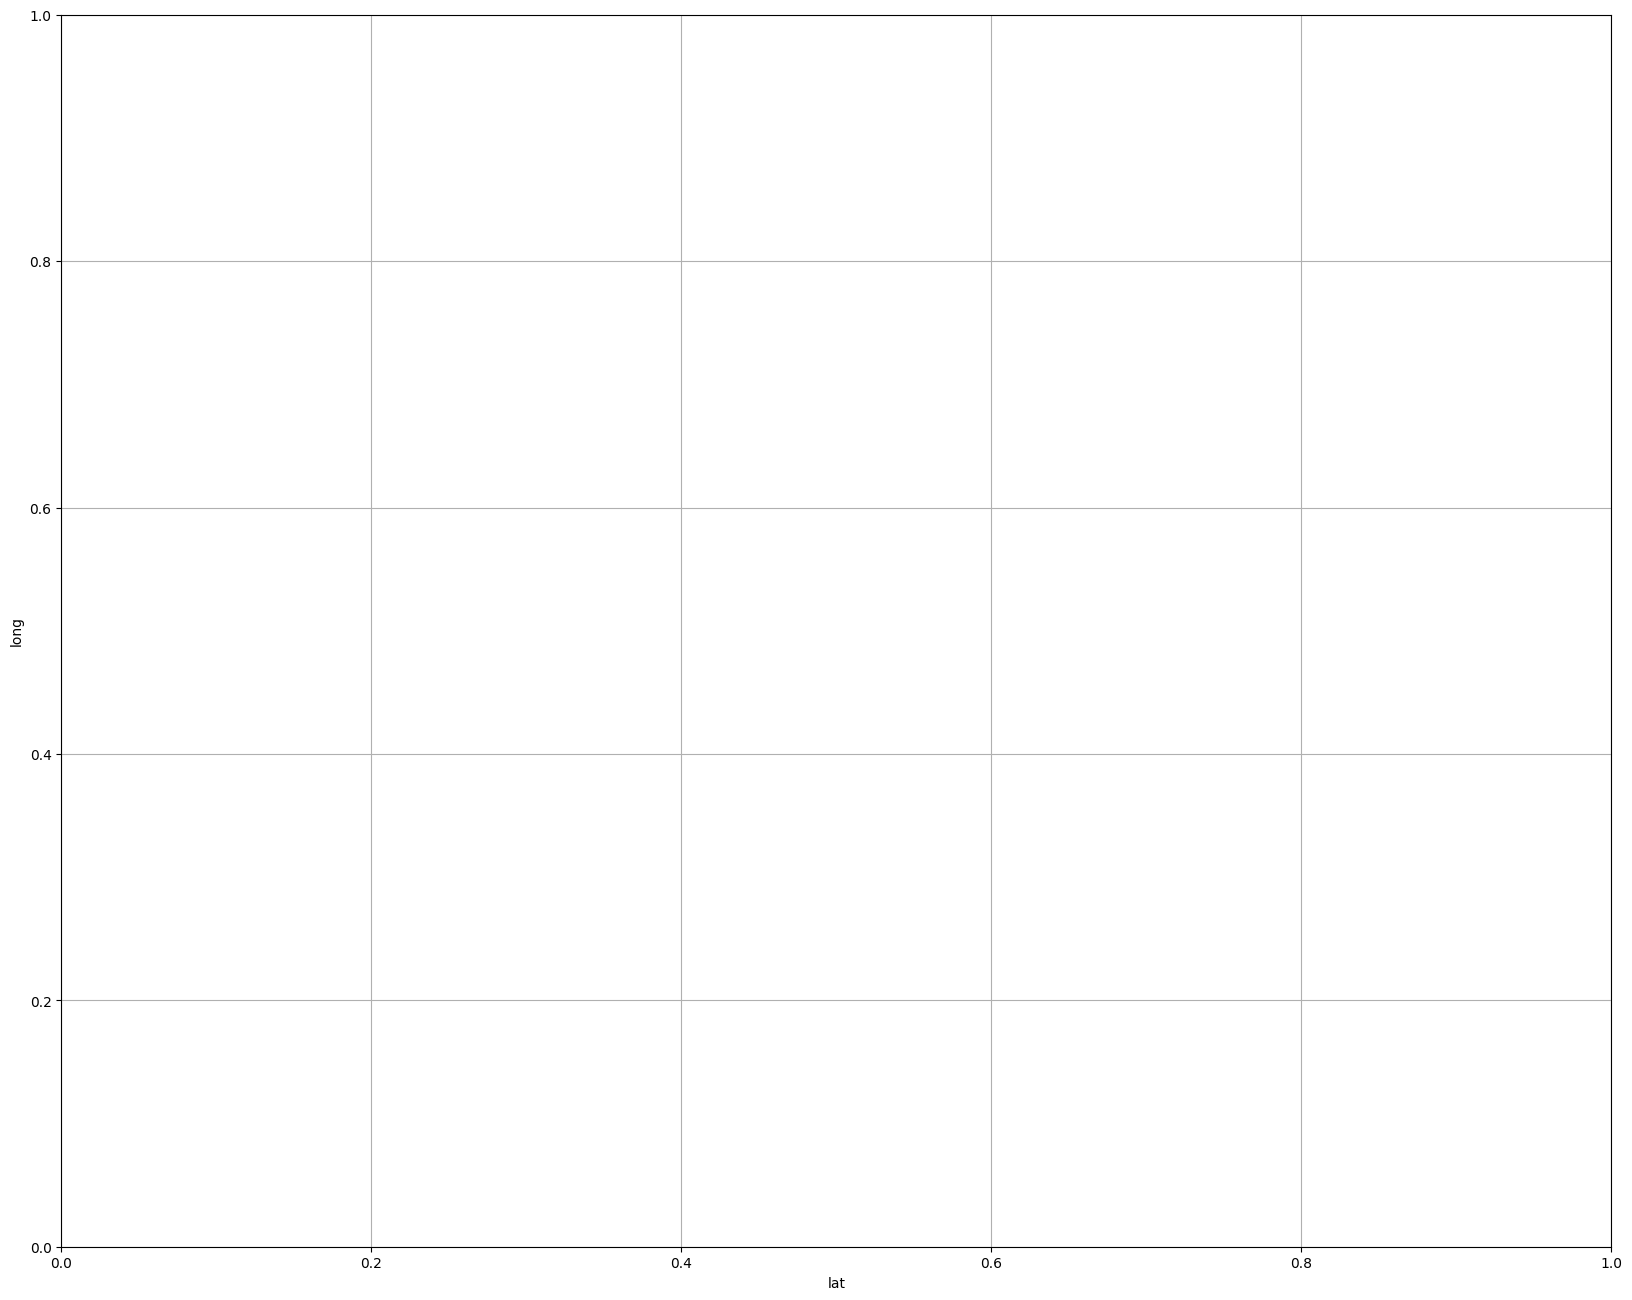

In [52]:
X = df[["lat", "long"]]
X = X.values

# 그렇다면, 군집하기 전에 시각화를 한 번 해볼까?
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.figure(figsize=(20, 16))
plt.grid(True)
plt.xlabel("lat")
plt.ylabel("long")
plt.show()

# DBSCAN 사용 시 장점 : 군집 개수 정하지 않아도 됨!!
# 단점 : eps를 계산해야 함...

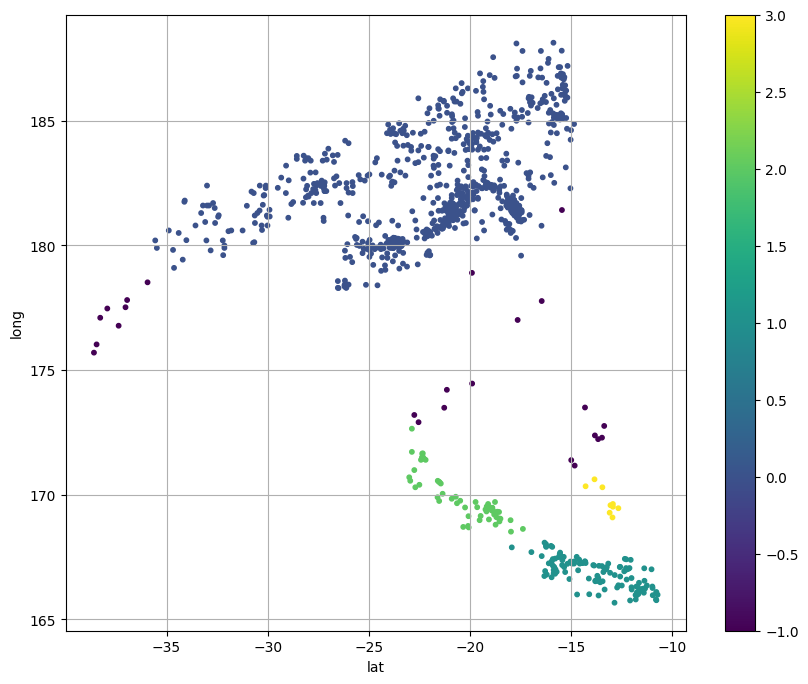

In [65]:
# eps=1.0으로 두고 출발하자
# min_samples=5

dbscan = DBSCAN(eps=1.0, min_samples=5)
clusters = dbscan.fit_predict(X)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=10, cmap="viridis")
plt.xlabel("lat")
plt.ylabel("long")
plt.colorbar()
plt.grid(True)
plt.show()

In [58]:
# -1은 노이즈
set(clusters) # -1을 제외한 군집 개수 : 4개

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3)}

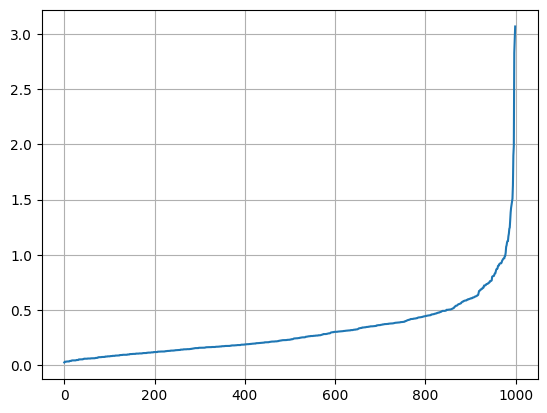

In [61]:
from sklearn.neighbors import NearestNeighbors
# 신나는 eps 찾기 모험
# K-distance알고리즘 활용하여
# eps, min_samples
# 1) min_samples은 feature 개수 x 2 정도로 설정!!
# 만약, min_samples을 5로 설정했다면
# 각 점(데이터 포인트)에서 4개의 점 까지 거리 계산
k = 4
nn = NearestNeighbors(n_neighbors=k)
neighbor = nn.fit(X)
distance, indices = neighbor.kneighbors(X)

# 거리를 가지고 그래프를 그려보자
# 그리기 전에 정렬하자
import numpy as np
dist_sorted = np.sort(distance[:, k - 1], axis=0)
plt.plot(dist_sorted)
plt.grid(True)
plt.show()

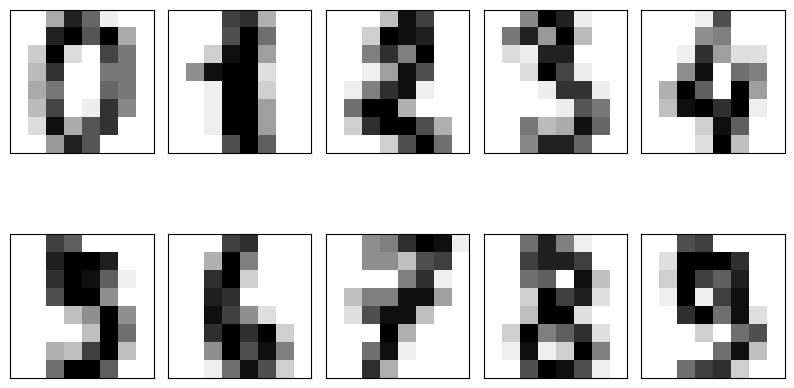

In [82]:
# 차원 축소
from sklearn.datasets import load_digits
digits = load_digits()

fig, axis = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={"xticks":[], "yticks":[]},
                        gridspec_kw=dict(hspace=0.4, wspace=0.1))
count = 0
for i in range(2):
    for j in range(5):
        axis[i, j].imshow(digits["images"][count], cmap="binary", interpolation="nearest")
        count += 1
plt.show()

In [92]:
# 각 데이터가 64개의 feature를 가지고 있다
# 64개중에서 어떤 feature가 중요한가?
# feature를 줄이는 작업 : 차원 축소
# 조건 : 줄여진 feature들이 원래의 data를 잘 표현해야 함
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
print("원본 데이터의 차원 :", X.shape)
# 차원 축소 후 원래의 데이터를 얼마나 잘 표현

# 차원 축소
# 첫 번째 모델 : 주 성분 분석(PCA, Principal Component Analysis)
# - 원리 : 데이터의 분산이 가장 큰 방향을 새로운 축(주성분)으로 설정하여
#         원본 데이터를 투영

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 64 -> 2
X_pca = pca.fit_transform(X)
print("축소된 데이터의 차원 :", X_pca.shape)

print("축소된 데이터의 주성분이 원본을 얼마나 표현하는지")
print(round(sum(pca.explained_variance_ratio_), 2))
# 0.29가 의미하는 내용
# 64차원을 2차원으로 축소했는데
# 해당 2차원 데이터가 원본을 29%나 표현하고 있다

원본 데이터의 차원 : (1797, 64)
축소된 데이터의 차원 : (1797, 2)
축소된 데이터의 주성분이 원본을 얼마나 표현하는지
0.29


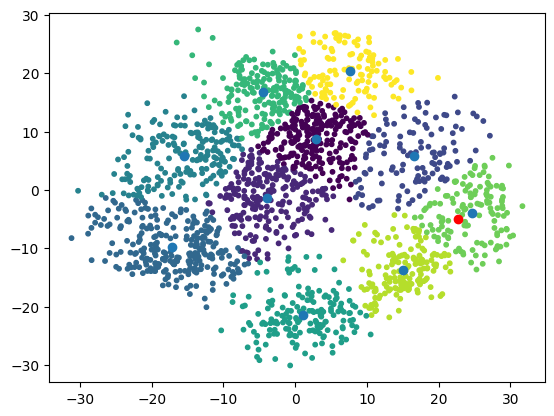

In [120]:
# 군집 사용해서 K-Means
# 10개로 시각화 시켜주실 수 있나요?
# n_init : 중심점 이동하는 횟수
kmeans = KMeans(n_clusters=10, n_init="auto", random_state=42)
kmeans.fit(X_pca)
centors = kmeans.cluster_centers_
labels = kmeans.labels_

# 만약, 새로운 데이터가 들어 왔다
new_data = kmeans.predict(X_pca[100].reshape(1, -1))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=10)
plt.scatter(centors[:, 0], centors[:, 1])
plt.scatter(X_pca[100][0], X_pca[100][1], c="red")
plt.show()

In [121]:
# 1) 군집
# 2) 차원 축소
# 3) Association Rule Mining)
# - 특정 feature들간에 규칙을 찾아내는 기법
# 여러분들이 가게를 운영
# 우유가 안 팔림 ->
# 카스테라 빵을 사는 사람은 우유를 살 확률이 일반 소비자보다 3배 높다
# 카스테라 + 우유 같이 진열

In [122]:
# 1. 전처리된 장바구니 데이터 (총 10개의 거래)
dataset = [
    ['우유', '계란', '빵'],
    ['우유', '기저귀', '맥주', '감자칩'],
    ['계란', '빵', '주스'],
    ['우유', '기저귀', '맥주', '콜라'],
    ['빵', '계란', '우유'],
    ['기저귀', '맥주', '주스'],
    ['빵', '콜라'],
    ['우유', '계란', '빵', '감자칩'],
    ['기저귀', '맥주'],
    ['우유', '빵']
]

In [132]:
# 문자열 -> 범주형 데이터
# DataFrame 
# 데이터프레임명.info()
# int64, object, bool
# 타이타닉 Sex -> male, female -> 상관관계 분석 (X)
# 수치형 데이터가 아니기 때문에

# 간단한 전처리
# 범주형 데이터를 어떻게 전처리 할 것인가?
# 1) 레이블 인코딩
item_list = []
for data in dataset:
    for d in data:
        item_list.append(d)
item_list = list(set(item_list))
item_list.sort()
item_list
item_dict = {}

for index, item in enumerate(item_list):
    item_dict[item] = index

# 인코딩 결과
enconded_list = []
for data in dataset:
    temp = []
    for d in data:
        temp.append(item_dict[d])
    enconded_list.append(temp)

enconded_list

[[5, 1, 4],
 [5, 2, 3, 0],
 [1, 4, 6],
 [5, 2, 3, 7],
 [4, 1, 5],
 [2, 3, 6],
 [4, 7],
 [5, 1, 4, 0],
 [2, 3],
 [5, 4]]

In [133]:
dataset

[['우유', '계란', '빵'],
 ['우유', '기저귀', '맥주', '감자칩'],
 ['계란', '빵', '주스'],
 ['우유', '기저귀', '맥주', '콜라'],
 ['빵', '계란', '우유'],
 ['기저귀', '맥주', '주스'],
 ['빵', '콜라'],
 ['우유', '계란', '빵', '감자칩'],
 ['기저귀', '맥주'],
 ['우유', '빵']]

In [138]:
# 레이블 인코딩 -> 함수
from sklearn.preprocessing import LabelEncoder

# 그 전에 dataset을 df로 변환
items = []
for data in dataset:
    for d in data:
        items.append(d)
items = list(set(items))
df = pd.DataFrame({"item" : items})

le = LabelEncoder()
df["encoded_label"] = le.fit_transform(df["item"])

# 레이블 인코딩

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

In [145]:
# 원-핫 인코딩
# 데이터들을 쭉 나열
# 우유 계란 빵 기저귀 맥주 감자칩
# True True True False False False
# 함수 사용하지 않고 직접 One-Hot Encoding
items = []
for data in dataset:
    for d in data:
        items.append(d)
items = list(set(items))
items.sort()

item_dict = {}
for index, item in enumerate(items):
    item_dict[item] = index
# 원-핫 인코딩 진행
enconded_list = []

for data in dataset:
    temp = [0] * len(items)
    for d in data:
        # temp = [0, 0, 0, 0, 0, 0, 0, 0]
        # d : 기저귀
        temp[item_dict[d]] = 1
    enconded_list.append(temp)

df = pd.DataFrame(enconded_list, columns=items)
df.astype(bool)

,감자칩,계란,기저귀,맥주,빵,우유,주스,콜라
0,False,True,False,False,True,True,False,False
1,True,False,True,True,False,True,False,False
2,False,True,False,False,True,False,True,False
3,False,False,True,True,False,True,False,True
4,False,True,False,False,True,True,False,False
5,False,False,True,True,False,False,True,False
6,False,False,False,False,True,False,False,True
7,True,True,False,False,True,True,False,False
8,False,False,True,True,False,False,False,False
9,False,False,False,False,True,True,False,False


In [ ]:
# 좀 더 간편하게 One-Hot Encoding
!pip install mlxtend

In [156]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
temp = te.fit(dataset).transform(dataset)
df = pd.DataFrame(temp, columns=items)

# 연관 규칙 분석
from mlxtend.frequent_patterns import apriori
# support (지지도) : 전체 데이터 중 해당 값이 포함될 확률
freq = apriori(df, min_support=0.2, use_colnames=True)
freq

,support,itemsets
0,0.2,(감자칩)
1,0.4,(계란)
2,0.4,(기저귀)
3,0.4,(맥주)
4,0.6,(빵)
5,0.6,(우유)
6,0.2,(주스)
7,0.2,(콜라)
8,0.2,"(감자칩, 우유)"
9,0.4,"(계란, 빵)"


In [162]:
# 신뢰도
# 우유를 4명이 샀다 
# 그 사람들 중 빵을 3명이 샀으면
# 우유 -> 빵 : 신뢰도가 0.75
from mlxtend.frequent_patterns import association_rules
rules = association_rules(freq, min_threshold=0.6) # 신뢰도가 60% 이상
rules.sort_values(by="lift", ascending=False)
# lift : 우연히 2개의 물품을 동시에 샀다면 lift 낮다
# 실제 연관성이 있으면 lift가 높다
# 기저귀 -> 맥주 lift가 2.5
# 기저귀를 산 사람은 기저귀를 사지 않은 사람보다 맥주를 구입할 확률이 250%

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(기저귀),(맥주),0.4,0.4,0.4,1.000000,2.500000,1.0,0.24,inf,1.000000,1.000000,1.000000,1.000000
5,(맥주),(기저귀),0.4,0.4,0.4,1.000000,2.500000,1.0,0.24,inf,1.000000,1.000000,1.000000,1.000000
13,"(맥주, 우유)",(기저귀),0.2,0.4,0.2,1.000000,2.500000,1.0,0.12,inf,0.750000,0.500000,1.000000,0.750000
12,"(기저귀, 우유)",(맥주),0.2,0.4,0.2,1.000000,2.500000,1.0,0.12,inf,0.750000,0.500000,1.000000,0.750000
11,(계란),"(빵, 우유)",0.4,0.4,0.3,0.750000,1.875000,1.0,0.14,2.4,0.777778,0.600000,0.583333,0.750000
10,"(빵, 우유)",(계란),0.4,0.4,0.3,0.750000,1.875000,1.0,0.14,2.4,0.777778,0.600000,0.583333,0.750000
9,"(계란, 우유)",(빵),0.3,0.6,0.3,1.000000,1.666667,1.0,0.12,inf,0.571429,0.500000,1.000000,0.750000
2,(빵),(계란),0.6,0.4,0.4,0.666667,1.666667,1.0,0.16,1.8,1.000000,0.666667,0.444444,0.833333
0,(감자칩),(우유),0.2,0.6,0.2,1.000000,1.666667,1.0,0.08,inf,0.500000,0.333333,1.000000,0.666667
1,(계란),(빵),0.4,0.6,0.4,1.000000,1.666667,1.0,0.16,inf,0.666667,0.666667,1.000000,0.833333


In [148]:
# 함수를 활용해서 One-Hot Encoding 해보자

from sklearn.preprocessing import OneHotEncoder
one_hot_e = OneHotEncoder(sparse_output=False) # numpy array로 변환
result = one_hot_e.fit_transform(enconded_list)
print(result)

[[1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]]


In [175]:
# 실제 데이터를 통해 분석

url = "https://github.com/nayeho/robot/raw/refs/heads/main/groceries.csv"

# url에서 실제 데이터를 직접 불러오기 위해
import urllib.request as urq

groceries = []
with urq.urlopen(url) as file:
    for row in file:

        row_list = row.decode("utf-8").strip().split(",")
        groceries.append(row_list)

# 1) One-Hot Encoding 통해서 전처리
te = TransactionEncoder()
arr = te.fit(groceries).transform(groceries)
df = pd.DataFrame(arr, columns=te.columns_)



,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(root vegetables, tropical fruit, whole milk)"
329,0.014540,"(yogurt, root vegetables, whole milk)"
330,0.010473,"(yogurt, soda, whole milk)"
331,0.015150,"(yogurt, tropical fruit, whole milk)"


In [181]:
# 2) 연관 규칙 분석 지지도, 신뢰도, lift 
freq = apriori(df, min_support=0.01, use_colnames=True)
freq.sort_values(by="support", ascending=False)

# 3) 신뢰도 계산
rules = association_rules(freq, metric="lift", min_threshold=1.5)
rules.sort_values(by="confidence", ascending=False)

# 1) support
# citrus fruit, root vegetables를 구매한 사람은 0.010371 (1%)
# other vegetables를 구매한 사람은 0.193493 (19%)
# 2) confidence
# citrus fruit, root vegetables를 구매한 사람중 other vegetables를 구매할 확률은 0.586207 (58%)
# 3) lift
# citrus fruit, root vegetables를 구매한 사람은 일반사람보다 other vegetables를 구매할 확률이 3배 더 높다
# 4) 결론
# 같이 두자...

# 여러분들이 시장 조사
# 구매 데이터!!!
# support, confidence, lift 조사하셔서 설득하시는 근거!!
# 마켓팅 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
224,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,1.0,0.006948,1.949059,0.681990,0.051646,0.486932,0.319903
290,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,1.0,0.008231,1.941244,0.683367,0.060835,0.484867,0.324062
240,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,1.0,0.005649,1.782567,0.571107,0.038313,0.439011,0.310874
216,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,1.0,0.006371,1.745992,0.565878,0.043512,0.427260,0.309285
356,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,1.0,0.006620,1.731553,0.563627,0.045350,0.422484,0.308502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,(whole milk),"(other vegetables, fruit/vegetable juice)",0.255516,0.021047,0.010473,0.040987,1.947371,1.0,0.005095,1.020792,0.653456,0.039358,0.020368,0.269286
239,(whole milk),"(yogurt, citrus fruit)",0.255516,0.021657,0.010269,0.040191,1.855768,1.0,0.004736,1.019310,0.619408,0.038476,0.018944,0.257185
275,(whole milk),"(other vegetables, pork)",0.255516,0.021657,0.010168,0.039793,1.837394,1.0,0.004634,1.018887,0.612170,0.038081,0.018537,0.254638
245,(whole milk),"(yogurt, curd)",0.255516,0.017285,0.010066,0.039395,2.279125,1.0,0.005649,1.023017,0.753858,0.038313,0.022499,0.310874


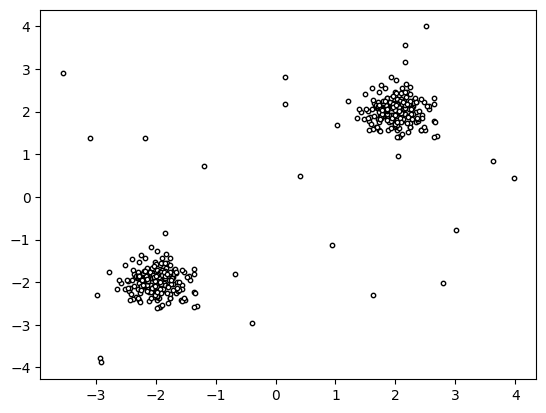

In [193]:
# 이상 탐지
# 정상 데이터와 다른 데이터를 구분
# 보안, 안전 분야에서 각광
# Isolation Forest 고립된 숲
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

# 실습용 데이터 만들기
np.random.seed(42) # 해당 로직에서 랜덤 시드 고정

# 정상 데이터 200개 만들기
X_normal = np.random.randn(200, 2) * 0.3
X_normal = np.r_[X_normal + 2, X_normal - 2]

# 이상 데이터 20개 만들기
X_outlier = np.random.uniform(low=-4, high=4, size=(20, 2))
X_outlier # -4 ~ 4 범위를 가진 20개의 데이터 (2개의 feature)

X = np.r_[X_normal, X_outlier]
X.shape # 정상 200 x 2 + 이상 20개

# 이상 탐지 이전 시각화!!
plt.scatter(X[:, 0], X[:, 1], s=10, c="white", edgecolors="black")
plt.show()

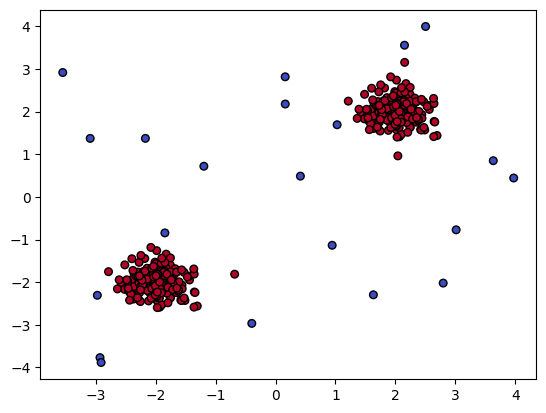

In [209]:
# 고립된 숲
# contamination 이상치 추정 (비우면 자동으로 진행)
isf = IsolationForest(contamination=0.05, random_state=42)
y_pred = isf.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="coolwarm", s=30, edgecolors="black")
plt.show()

In [ ]:
# 28만개
!curl -L https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv -o creditcard.csv

In [ ]:
# 카드 거래 명세
# 해외 결제를 카드로 한 번 
import pandas as pd

df = pd.read_csv("creditcard.csv")

In [222]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


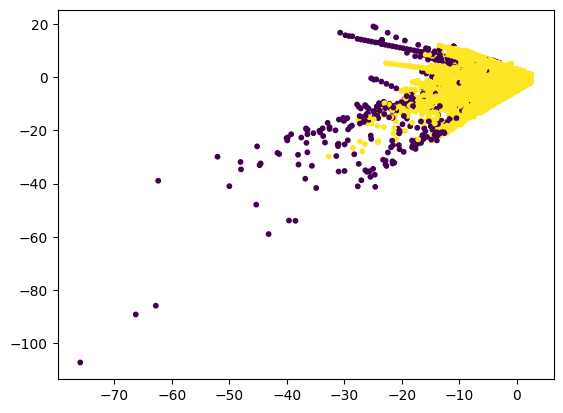

In [233]:
df.head() # V1 ~ V28 개인정보 보호를 위해 마스킹 처리 된 feature
# class : 0 -> 정상
# class : 1 -> 사기 거래 (0.17%)
df["Class"].value_counts()
df.head()
# Time, Amount를 전처리-스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["Scaled_Amout"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df["Scaled_Time"] = scaler.fit_transform(df["Time"].values.reshape(-1, 1))
X = df.drop(["Time", "Amount", "Class"], axis=1)
X.head()

# 실제 사기 비율?? : 0.17%
fraud_ratio = df["Class"].value_counts(normalize=True)[1]

isf = IsolationForest(contamination=fraud_ratio, random_state=42)
y_pred = isf.fit_predict(X)

# feature가 30개 -> 2개로 차원 축소
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, s=10)
plt.show()

In [ ]:
# 전처리 

In [251]:
test = pd.read_csv("test.csv")
test["Survived"] = test["Sex"].apply(lambda x : 1 if x == "female" else 0)

test = test[["PassengerId", "Survived"]]

test.to_csv("test5.csv", index=None)

In [258]:
# train.csv를 가지고 오자
import pandas as pd
train = pd.read_csv("train.csv")
# 결측치 확인 용 info
# train.info()
# 우리가 처리해야 할 결측치 3개 컬럼 ("Age", "Cabin", "Embarked")

# 결측치 개수 확인
print("초기 결측치 개수 :", train.isnull().sum())

초기 결측치 개수 : PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Age컬럼의 결측치를 어떻게 처리할건지
# 10분 쉬었다 고민

# 1) mean으로 대체하자
# 2) median으로 대체하자
# 3) 최빈값으로 대체하자

mean_age = train["Age"].mean()
train["Age"].fillna(mean_age, inplace=True)

train["Age"].describe()

In [265]:
# "Cabin"은 결측치가 너무 많다 700개 / 900개
# 모델 학습에 "Cabin" 컬럼은 제외하자
train = train.drop("Cabin", axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [272]:
# "Embarked" 2개 결측치 처리하자
train["Embarked"].value_counts() # S가 가장 많다
train["Embarked"] = train["Embarked"].fillna("S")
train["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [280]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [294]:
train.isnull().sum() # 결측치 해결 완료!!

# 범주형 -> True, False 전처리
# One-Hot Encoding (Sex, Embarked)

# 좀 더 간편한 인코딩!!
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
train["Female"] = te.fit(train["Sex"]).fit_transform(train[["Sex"]].values)[:, 0]
train["Male"] = te.fit(train["Sex"]).fit_transform(train[["Sex"]].values)[:, 1]
train["C"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:, 0]
train["Q"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:, 1]
train["S"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:, 2]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Male,Female,S,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,True,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,True,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,True,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True,False,False


In [311]:
# 의사 결정 트리
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# train에서 필요 없는 컬럼 drop
train_d = train.drop(["PassengerId", "Name", "Ticket", "Sex", "Embarked"], axis=1)

X = train_d.iloc[ : , 1 : ]
y = train_d.iloc[ : , 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
d_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print(f"정확도 : {accuracy}")

정확도 : 0.8026905829596412


In [314]:
# 타이타닉 데이터 전처리 함수

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
def titanic_preprcess(file):
    train = pd.read_csv(file)
    
    mean_age = train["Age"].mean()
    train["Age"].fillna(mean_age, inplace=True)
    
    train["Age"].describe()
    train = train.drop("Cabin", axis=1)
    
    train["Embarked"].value_counts()
    train["Embarked"] = train["Embarked"].fillna("S")
    train["Embarked"].value_counts()

    te = TransactionEncoder()
    train["Female"] = te.fit(train["Sex"]).fit_transform(train[["Sex"]].values)[:, 0]
    train["Male"] = te.fit(train["Sex"]).fit_transform(train[["Sex"]].values)[:, 1]
    train["C"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:, 0]
    train["Q"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:, 1]
    train["S"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:, 2]
    return train

In [ ]:
# 의사 결정 트리
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# train에서 필요 없는 컬럼 drop
train_d = train.drop(["PassengerId", "Name", "Ticket", "Sex", "Embarked"], axis=1)

X = train_d.iloc[ : , 1 : ]
y = train_d.iloc[ : , 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
d_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print(f"정확도 : {accuracy}")

In [320]:
test = titanic_preprcess("test.csv")
test_d = test.drop(["PassengerId", "Name", "Ticket", "Sex", "Embarked"], axis=1)
test_pred = d_tree.predict(test_d.iloc[ : , : ])
test_pred

C:\Users\Intel Master\AppData\Local\Temp\ipykernel_14476\1118237575.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(mean_age, inplace=True)


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [ ]:
# test.csv 도 로드 이후에 전처리 

In [295]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Male,Female,S,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,True,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,True,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,True,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True,False,False
